Data Mining 2019/20

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
df = pd.read_csv('training.csv')

In [3]:
df.head()

RefId  IsBadBuy   PurchDate  Auction  VehYear  VehicleAge      Make  \
0    326         1  10/25/2010    ADESA     2008           2       KIA   
1  42991         0   5/27/2009  MANHEIM     2006           3     DODGE   
2  55273         0   3/18/2010    OTHER     2008           2     DODGE   
3  29058         0    6/8/2009    OTHER     2005           4      FORD   
4  34991         0    3/4/2009  MANHEIM     2005           4  CHRYSLER   

                  Model Trim          SubModel  ...  \
0               SPECTRA   EX       4D SEDAN EX  ...   
1  STRATUS V6 2.7L V6 M  SXT  4D SEDAN SXT FFV  ...   
2               CALIBER   SE          4D WAGON  ...   
3  FREESTAR FWD V6 3.9L    S    PASSENGER 3.9L  ...   
4  TOWN & COUNTRY FWD V  Bas      MINIVAN 3.3L  ...   

  MMRCurrentRetailAveragePrice MMRCurrentRetailCleanPrice  PRIMEUNIT AUCGUART  \
0                       9605.0                    10650.0        NaN      NaN   
1                       6418.0                     7478.0        NaN      NaN   
2                      10721.0                    11350.0        NaN      NaN   
3                       5702.0                     7691.0        NaN      NaN   
4                       6300.0                     7856.0        NaN      NaN   

   BYRNO VNZIP1 VNST VehBCost  IsOnlineSale  WarrantyCost  
0   5546  33619   FL   6100.0             0           533  
1  99750  32124   FL   4000.0             0          1630  
2  99761  74135   OK   7500.0             0           693  
3  99761  85018   AZ   4725.0             0          1633  
4  20833  75236   TX   5670.0             0          1623  

[5 rows x 34 columns]

I tipi mi sembrano tutti giusti, considerando che degli attributi che sono int64 o float64, gli unici di cui ha senso calcolare la media sono tutti gli MMR, VehBCost, WarrantyCost, e volendo anche vehOdo, vehYear e vehAge. Gli altri son tutti o contatori (refId e BYRNO) o categorie (tutti gli altri)

In [4]:
df.describe()

RefId      IsBadBuy       VehYear    VehicleAge   WheelTypeID  \
count  58386.000000  58386.000000  58386.000000  58386.000000  55813.000000   
mean   36567.888449      0.123454   2005.344637      4.174956      1.495566   
std    21092.254801      0.328961      1.733307      1.713833      0.520802   
min        1.000000      0.000000   2001.000000      0.000000      0.000000   
25%    18270.250000      0.000000   2004.000000      3.000000      1.000000   
50%    36608.500000      0.000000   2005.000000      4.000000      1.000000   
75%    54811.500000      0.000000   2007.000000      5.000000      2.000000   
max    73014.000000      1.000000   2010.000000      9.000000      3.000000   

              VehOdo  MMRAcquisitionAuctionAveragePrice  \
count   58386.000000                       58373.000000   
mean    71478.090518                        6128.127953   
std     14591.224550                        2456.632611   
min      4825.000000                           0.000000   
25%     61785.000000                        4273.000000   
50%     73359.000000                        6097.000000   
75%     82427.000000                        7765.000000   
max    115717.000000                       35722.000000   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
count                     58373.000000                      58373.000000   
mean                       7372.912699                       8497.288558   
std                        2715.506462                       3151.106237   
min                           0.000000                          0.000000   
25%                        5409.000000                       6279.000000   
50%                        7308.000000                       8448.000000   
75%                        9017.000000                      10652.000000   
max                       36859.000000                      39080.000000   

       MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
count                   58373.000000                   58141.000000   
mean                     9851.768061                    6131.666655   
std                      3378.839613                    2432.171539   
min                         0.000000                       0.000000   
25%                      7501.000000                    4275.000000   
50%                      9798.000000                    6063.000000   
75%                     12084.000000                    7737.000000   
max                     41482.000000                   35722.000000   

       MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
count                 58141.000000                  58141.000000   
mean                   7389.958652                   8776.065118   
std                    2682.310828                   3086.373733   
min                       0.000000                      0.000000   
25%                    5415.000000                   6538.000000   
50%                    7311.000000                   8733.000000   
75%                    9014.000000                  10910.000000   
max                   36859.000000                  39080.000000   

       MMRCurrentRetailCleanPrice         BYRNO        VNZIP1      VehBCost  \
count                58141.000000  58386.000000  58386.000000  58386.000000   
mean                 10145.227034  26359.191519  58125.258195   6730.008335   
std                   3304.637060  25804.795573  26146.806098   1762.075265   
min                      0.000000    835.000000   2764.000000      1.000000   
25%                   7788.000000  17212.000000  32124.000000   5430.000000   
50%                  10103.000000  19662.000000  74135.000000   6700.000000   
75%                  12309.000000  22808.000000  80022.000000   7900.000000   
max                  41062.000000  99761.000000  99224.000000  36485.000000   

       IsOnlineSale  WarrantyCost  
count  58386.000000  58386.000000  
mean       0.025674   1276.105042  
std        0

SCARTEREI:
PRIMEUNIT,AUCGUART
Dobbiamo ricordarci, in caso in cui consegnassimo alcune di queste tabelle nel report, di NON usare tutti gli attributi come in questo caso ma filtrare solo quelli per cui i valori mostrati hanno senso


In [5]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Trim                                  1911
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2573
WheelType                             2577
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          245
MMRCurrentAuctionCleanPrice            245
MMRCurrentRetailAveragePrice           245
MMRCurrentRetailCleanPrice             245
PRIMEUNIT                            55703
AUCGUART                             55703
dtype: int64

In [6]:
df.drop(columns=['RefId']).corr()

IsBadBuy   VehYear  VehicleAge  \
IsBadBuy                           1.000000 -0.156926    0.165325   
VehYear                           -0.156926  1.000000   -0.958049   
VehicleAge                         0.165325 -0.958049    1.000000   
WheelTypeID                       -0.047693  0.261366   -0.252018   
VehOdo                             0.082858 -0.283569    0.318778   
MMRAcquisitionAuctionAveragePrice -0.105793  0.582416   -0.567106   
MMRAcquisitionAuctionCleanPrice   -0.099315  0.533807   -0.519897   
MMRAcquisitionRetailAveragePrice  -0.084514  0.582414   -0.462299   
MMRAcquisitonRetailCleanPrice     -0.080712  0.540206   -0.427526   
MMRCurrentAuctionAveragePrice     -0.106130  0.591968   -0.576914   
MMRCurrentAuctionCleanPrice       -0.101036  0.549345   -0.533646   
MMRCurrentRetailAveragePrice      -0.100786  0.599415   -0.505322   
MMRCurrentRetailCleanPrice        -0.097195  0.559579   -0.470640   
BYRNO                             -0.059412  0.281799   -0.269907   
VNZIP1                             0.006393  0.069976   -0.076617   
VehBCost                          -0.098132  0.349672   -0.311903   
IsOnlineSale                      -0.003969  0.057316   -0.024659   
WarrantyCost                       0.050259 -0.267739    0.257996   

                                   WheelTypeID    VehOdo  \
IsBadBuy                             -0.047693  0.082858   
VehYear                               0.261366 -0.283569   
VehicleAge                           -0.252018  0.318778   
WheelTypeID                           1.000000 -0.212432   
VehOdo                               -0.212432  1.000000   
MMRAcquisitionAuctionAveragePrice    -0.094658 -0.018381   
MMRAcquisitionAuctionCleanPrice      -0.129608  0.023717   
MMRAcquisitionRetailAveragePrice     -0.071736  0.029107   
MMRAcquisitonRetailCleanPrice        -0.101796  0.061407   
MMRCurrentAuctionAveragePrice        -0.086798 -0.030141   
MMRCurrentAuctionCleanPrice          -0.120046  0.010755   
MMRCurrentRetailAveragePrice         -0.072684  0.013719   
MMRCurrentRetailCleanPrice           -0.101250  0.046070   
BYRNO                                 0.189817 -0.292230   
VNZIP1                                0.007846 -0.053547   
VehBCost                             -0.160986 -0.064436   
IsOnlineSale                         -0.011364  0.030994   
WarrantyCost                         -0.133688  0.411273   

                                   MMRAcquisitionAuctionAveragePrice  \
IsBadBuy                                                   -0.105793   
VehYear                                                     0.582416   
VehicleAge                                                 -0.567106   
WheelTypeID                                                -0.094658   
VehOdo                                                     -0.018381   
MMRAcquisitionAuctionAveragePrice                           1.000000   
MMRAcquisitionAuctionCleanPrice                             0.990218   
MMRAcquisitionRetailAveragePrice                            0.910185   
MMRAcquisitonRetailCleanPrice                               0.909832   
MMRCurrentAuctionAveragePrice                               0.937482   
MMRCurrentAuctionCleanPrice                                 0.931919   
MMRCurrentRetailAveragePrice                                0.871220   
MMRCurrentRetailCleanPrice                                  0.870424   
BYRNO                                                       0.108806   
VNZIP1                                                      0.047112   
VehBCost                                                    0.789354   
IsOnlineSale                                                0.038029   
WarrantyCost                                               -0.049682   

                                   MMRAcquisitionAuctionCleanPrice  \
IsBadBuy                                                 -0.099315   
VehYear                                                   0.533807   
Veh

Pandas è un bravo ragazzo, e ha eliminato di sua spontanea iniziativa PRIMEUNIT e AUCGUART. Ha anche tolto purchDate, auction, Make, Model, Trim, SubModel, Color, Transmission, WheelType (ha mantenuto l'id), Nationality, Size, TopThreeAmericanNames, VNST. 
- WarrantyCost e vehOdo: macchine con tanti km -> assicurazione costa tanto -> (forse) prob. bad buy?
C'è buona correlazione con tutti gli atttributi relativi al prezzo. Forse dobbiamo, più avanti, spendere un po' di tempo a cercare di cavare qualche variabile sensata da questi valori (che ne so, VehBCost/MMRAcquisitionAuctionAveragePrice e così via)

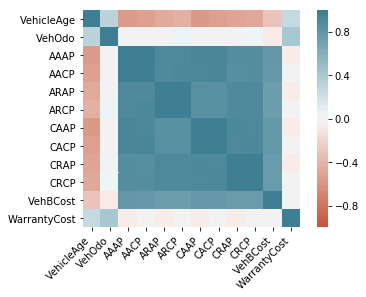

In [7]:
df.rename(columns={ 'MMRAcquisitionAuctionAveragePrice':'AAAP',
                    'MMRAcquisitionRetailAveragePrice':'ARAP',
                    'MMRCurrentAuctionAveragePrice':'CAAP',
                    'MMRCurrentRetailAveragePrice':'CRAP',
                    'MMRAcquisitionAuctionCleanPrice': 'AACP',
                    'MMRAcquisitonRetailCleanPrice': 'ARCP',
                    'MMRCurrentAuctionCleanPrice': 'CACP',
                    'MMRCurrentRetailCleanPrice': 'CRCP'
                  },inplace=True)

corr = df.drop(columns=['RefId',
        'VehYear',
        'IsBadBuy',
        'WheelTypeID',
        'BYRNO',
        'VNZIP1',
        'IsOnlineSale'],
        axis=1).corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [8]:
df.drop(columns=['RefId',
        'VehYear',
        'IsBadBuy',
        'WheelTypeID',
        'BYRNO',
        'VNZIP1',
        'IsOnlineSale'],
        axis=1).corr()

VehicleAge    VehOdo      AAAP      AACP      ARAP      ARCP  \
VehicleAge      1.000000  0.318778 -0.567106 -0.519897 -0.462299 -0.427526   
VehOdo          0.318778  1.000000 -0.018381  0.023717  0.029107  0.061407   
AAAP           -0.567106 -0.018381  1.000000  0.990218  0.910185  0.909832   
AACP           -0.519897  0.023717  0.990218  1.000000  0.902339  0.917934   
ARAP           -0.462299  0.029107  0.910185  0.902339  1.000000  0.990085   
ARCP           -0.427526  0.061407  0.909832  0.917934  0.990085  1.000000   
CAAP           -0.576914 -0.030141  0.937482  0.923144  0.851330  0.846393   
CACP           -0.533646  0.010755  0.931919  0.931599  0.848776  0.854986   
CRAP           -0.505322  0.013719  0.871220  0.860055  0.912747  0.902680   
CRCP           -0.470640  0.046070  0.870424  0.870604  0.905523  0.906231   
VehBCost       -0.311903 -0.064436  0.789354  0.781123  0.745718  0.744622   
WarrantyCost    0.257996  0.411273 -0.049682 -0.019607 -0.053507 -0.026708   

                  CAAP      CACP      CRAP      CRCP  VehBCost  WarrantyCost  
VehicleAge   -0.576914 -0.533646 -0.505322 -0.470640 -0.311903      0.257996  
VehOdo       -0.030141  0.010755  0.013719  0.046070 -0.064436      0.411273  
AAAP          0.937482  0.931919  0.871220  0.870424  0.789354     -0.049682  
AACP          0.923144  0.931599  0.860055  0.870604  0.781123     -0.019607  
ARAP          0.851330  0.848776  0.912747  0.905523  0.745718     -0.053507  
ARCP          0.846393  0.854986  0.902680  0.906231  0.744622     -0.026708  
CAAP          1.000000  0.990244  0.915147  0.912305  0.778253     -0.056893  
CACP          0.990244  1.000000  0.908620  0.921638  0.774637     -0.028245  
CRAP          0.915147  0.908620  1.000000  0.989693  0.756790     -0.058965  
CRCP          0.912305  0.921638  0.989693  1.000000  0.756551     -0.032932  
VehBCost      0.778253  0.774637  0.756790  0.756551  1.000000     -0.033901  
WarrantyCost -0.056893 -0.028245 -0.058965 -0.032932 -0.033901      1.000000

## Colonne rinominate con gli acronimi per cercare di capire qualcosa 
## +
## Rimosse tutte le colonne "CleanPrice"

Si può già notare come la colonna "VehicleAge" sia inversamente correlata (-0.6 circa) con il prezzo. 

Ciò ha molto senso dato che le auto 🚗 perdono valore con il passare degli anni. 😎

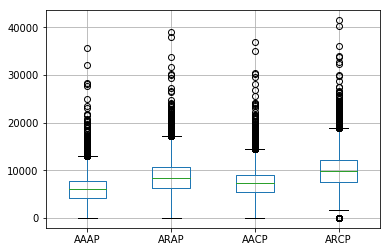

In [9]:
df.boxplot(column=['AAAP', 'ARAP', 'AACP', 'ARCP'])

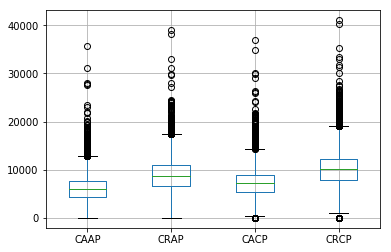

In [10]:
df.boxplot(column=['CAAP','CRAP','CACP','CRCP'])

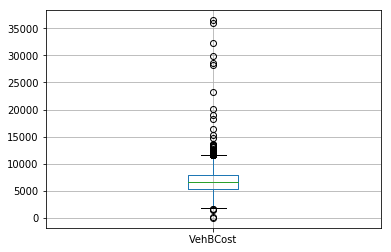

In [11]:
df.boxplot(column=['VehBCost'])

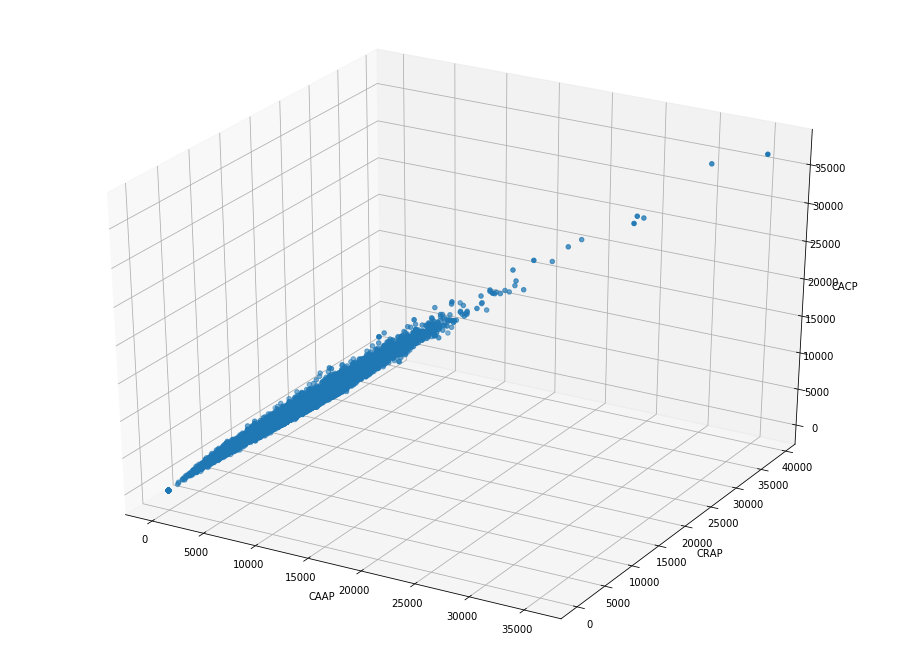

In [12]:
x = 'CAAP'
y = 'CRAP'
z = 'CACP'

fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(df[x],
           df[y],
           df[z])
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

In [13]:
fig = go.Figure(data=[go.Scatter3d(
    x=df[x],
    y=df[y],
    z=df[z],
    mode='markers',
    marker=dict(
        size=2,
#        color=kmeans.labels_,                # set color to an array/list of desired values
#        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                 scene = dict(
                     xaxis_title= x,
                     yaxis_title= y,
                     zaxis_title= z)
                 )
fig.show()

# Da provare prezzi/marca

In [14]:
pclass_xt = pd.crosstab(df['Transmission'], df['WheelType'])
pclass_xt

WheelType     Alloy  Covers  Special
Transmission                        
AUTO          27797   25432      539
MANUAL          937    1053       50

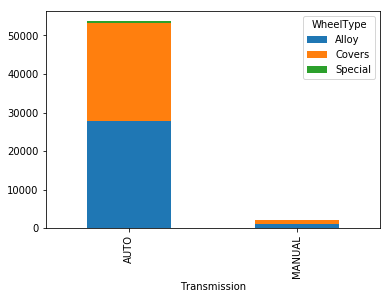

In [15]:
pclass_xt.plot(kind='bar', stacked=True)

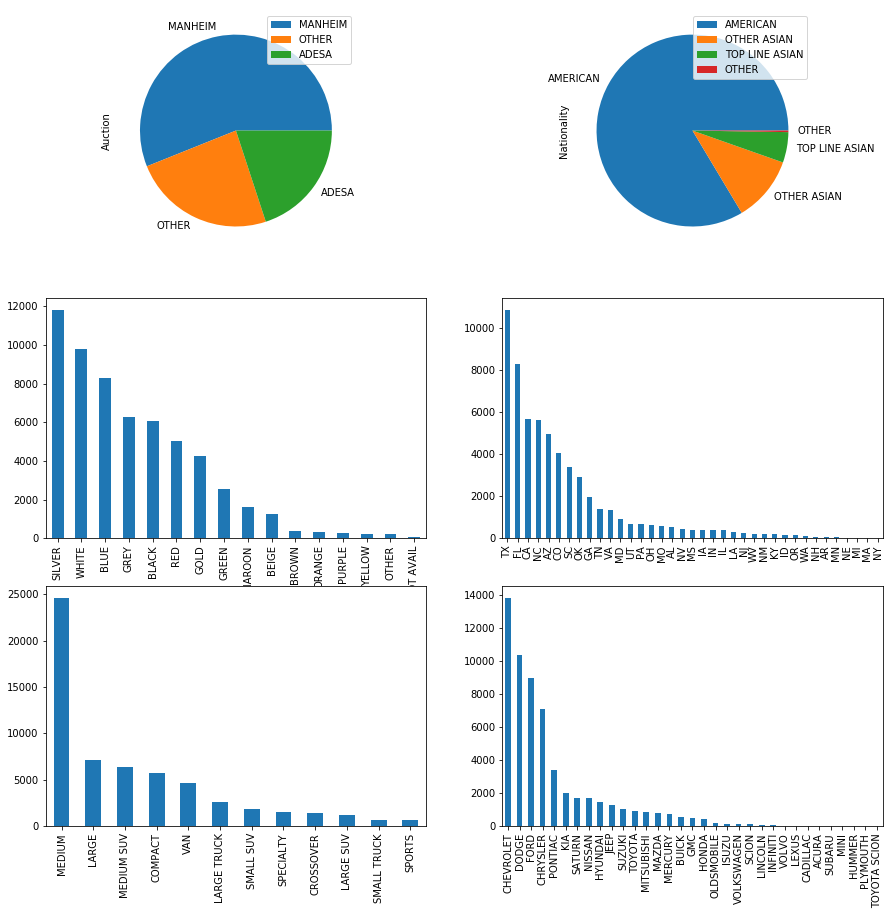

In [16]:
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
df['Auction'].value_counts().plot.pie(legend=True)

plt.subplot2grid(fig_dims, (0, 1))
df['Nationality'].value_counts().plot.pie(legend=True)

plt.subplot2grid(fig_dims, (1, 0))
df['Color'].value_counts().plot(kind='bar')

plt.subplot2grid(fig_dims, (1, 1))
df['VNST'].value_counts().plot(kind='bar')

plt.subplot2grid(fig_dims, (2, 0))
df['Size'].value_counts().plot(kind='bar')

plt.subplot2grid(fig_dims, (2, 1))
df['Make'].value_counts().plot(kind='bar')

In [17]:
df['BYRNO'].value_counts()

99761    3191
18880    2852
835      2398
3453     2362
22916    2285
21053    2267
19619    2173
99750    2136
20928    2099
17675    2066
21973    2010
17212    2006
20740    1895
5546     1775
18111    1707
18822    1689
8655     1688
23359    1673
20234    1641
20833    1604
19638    1490
22808    1466
18881    1380
16044    1309
25100    1308
19662    1211
20207    1068
16926    1066
52117     972
8172      886
         ... 
21047     117
1191       83
53245      67
1051       55
1151       54
1045       52
1085       43
10310      39
1081       30
11410      28
1031       26
1121       17
1141       14
1156        9
1035        9
18091       9
10410       8
1125        7
1055        7
1082        5
1152        5
1041        5
16369       5
11210       4
10510       3
10420       3
1157        1
10425       1
99741       1
1086        1
Name: BYRNO, Length: 72, dtype: int64

In [18]:
df.apply(lambda x : 'refID'==326)

RefId                   False
IsBadBuy                False
PurchDate               False
Auction                 False
VehYear                 False
VehicleAge              False
Make                    False
Model                   False
Trim                    False
SubModel                False
Color                   False
Transmission            False
WheelTypeID             False
WheelType               False
VehOdo                  False
Nationality             False
Size                    False
TopThreeAmericanName    False
AAAP                    False
AACP                    False
ARAP                    False
ARCP                    False
CAAP                    False
CACP                    False
CRAP                    False
CRCP                    False
PRIMEUNIT               False
AUCGUART                False
BYRNO                   False
VNZIP1                  False
VNST                    False
VehBCost                False
IsOnlineSale            False
WarrantyCo

In [19]:
df['WheelTypeIDDelete'] = df['WheelTypeID'].fillna(4)

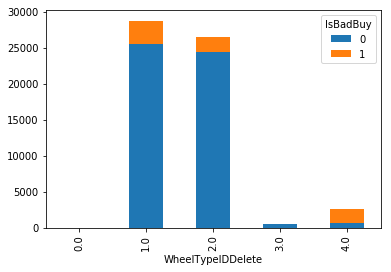

In [20]:
pclass_xt = pd.crosstab(df['WheelTypeIDDelete'], df['IsBadBuy'])
pclass_xt.plot(kind='bar', stacked=True)

Adesso cerco di trovare alcuni valori sbagliati (prezzi < 0, prezzi anomali, cose così)

In [21]:
len(df[df['VehBCost'] <= 0]) # numero di elementi in cui il costo è <= 0

0

In [22]:
len([(x, y) for x, y in zip(df['VehBCost'], df['ARCP']) if x > y and y != 0])
#([(x, y, z, odo, year) for x, y, z, odo, year in zip(df['VehBCost'], df['ARCP'], df['Trim'], df['VehOdo'], df['VehYear']) if x > y and y != 0])

2919

Per vedere la lista basta che togliete il commento alla seconda linea.
Non so a me questo sembra assurdo, però pare che sia normale. 2919 macchine sono state acquistate a prezzo maggiore rispetto a quello del concessionario. Questo vale anche per macchine comprate in opzione base ('Bas' nella terza colonna), e con alto chilometraggio. Ci ho messo anche l'anno del veicolo per far capire che non si tratta di auto d'epoca, quindi davvero non ho idea.
Secondo me è una cosa che vale la pena scrivere nel report: macchine vengono anche acquistate a un prezzo maggiore del concessionario anche se usate. Unica cosa dobbiamo capire se in retail ci stanno anche auto usate, e allora quindi tutto questo discorso non vale nulla. Inizialmente speravo di usare questo come controllo che i dati fossero corretti, però...

In [23]:
len([(y, a) for y, a in zip(df['VehYear'], df['VehicleAge']) if a+y < 2009 or a+y > 2010]) # gli anni son tutti corretti

0

In [24]:
len(df[df['VehOdo'] <= 0]) # numero di elementi in cui il contakm è <= 0

0

In [25]:
len(df[df['WarrantyCost'] <= 0]) # numero di elementi in cui il costo della garanzia è <= 0

0

Adesso verifico che in ogni caso, l'acquisto di un veicolo clean (above average condition) costi di più di quello medio (e infatti torna sempre perfetto in ogni caso

In [26]:
len([(x,y) for x,y in zip(df['AAAP'], df['AACP']) if x>y])

0

In [27]:
len([(x,y) for x,y in zip(df['ARAP'], df['ARCP']) if x>y])

0

In [28]:
len([(x,y) for x,y in zip(df['CAAP'], df['CACP']) if x>y])

0

In [29]:
len([(x,y) for x,y in zip(df['CRAP'], df['CRCP']) if x>y])

0

A questo punto cerco di risolvere qualche missing value:
Tutti i currentAuction hanno 250 missing values circa. Pensavo di sostituire, quando quelli medi sono disponibili, current con quelli medi

In [30]:
print(df.at[292, 'CAAP']) # abbiamo 245 missing values, e quello alla riga 292 è un missing value
df['CAAP'].isnull().sum()

nan


245

In [31]:
df['CAAP'].fillna(df['AAAP'],inplace=True)
print(df['CAAP'].isnull().sum()) # ho 13 missing values, che sono quelli di cui mi manca anche il valore medio
print(df.at[292, 'CAAP'] == df.at[292, 'AAAP']) # Ha correttamente riempito CAAP con il valore in AAAP all'id 292

13
True


Adesso devo fare la stessa cosa per gli altri current values

In [32]:
df['CRAP'].fillna(df['ARAP'],inplace=True)
df['CACP'].fillna(df['AACP'],inplace=True)
df['CRCP'].fillna(df['ARCP'],inplace=True)

Qua secondo me è simpatico per far  notare che in generale i bad buy si trovano in 3 zone
- Su macchine praticamente nuove (contakm basso e costo garanzia basso)
- Su macchine usate e rischiose (garanzia alta, contakm intorno a 40000-80000
- Su macchine stra usate

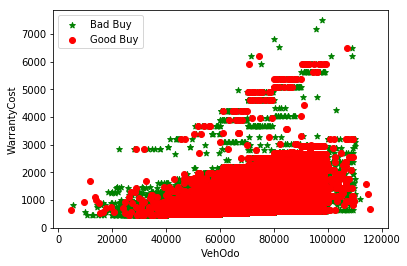

In [33]:
plt.scatter(df[df['IsBadBuy'] == 0]['VehOdo'], 
            df[df['IsBadBuy'] == 0]['WarrantyCost'], color='g', marker='*', label='Bad Buy')
plt.scatter(df[df['IsBadBuy'] == 1]['VehOdo'], 
            df[df['IsBadBuy'] == 1]['WarrantyCost'], color='r',label='Good Buy')
plt.xlabel('VehOdo')
plt.ylabel('WarrantyCost')
plt.legend()
plt.show()

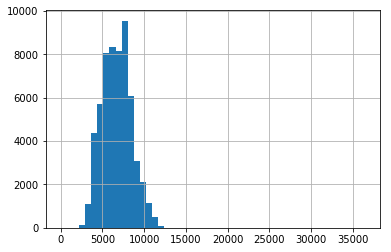

In [34]:
df['VehBCost'].hist(bins=50)
plt.show()

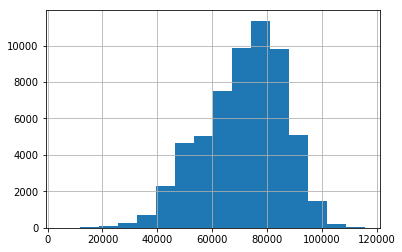

In [35]:
df['VehOdo'].hist(bins=16)
plt.show()

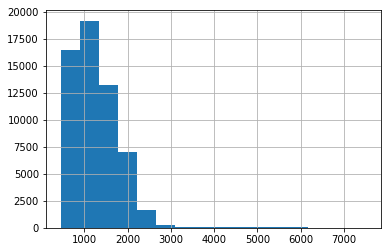

In [36]:
df['WarrantyCost'].hist(bins=16)
plt.show()

## Variable Sostitution & Redundancy Elimination

In [37]:
PAC = ['WA' ,'OR','AK','HI','CA']
MNT = ['MT' ,'WY','ID','NV','UT','CO','AZ','NM']
WNC = ['ND' ,'MN','SD','IA','NE','KS','MO']
WSC = ['OK' ,'AR','TX','LA']
ENC = ['WI' ,'MI','OH','IN','IL']
ESC = ['KY' ,'TN','MS','AL']
MAT = ['NY' ,'PA','NJ']
SAT = ['WV' ,'MD','DE','DC','VA','NC','SC','GA','FL']
NEN = ['ME' ,'NH','VT','MA','CT','RI']

In [38]:
sost = []
for i in df['VNST']:
    if i in PAC:
        sost.append('PAC')
    elif i in MNT:
        sost.append('MNT')
    elif i in WNC:
        sost.append('WNC')
    elif i in WSC:
        sost.append('WSC')
    elif i in ENC:
        sost.append('ENC')
    elif i in ESC:
        sost.append('ESC')
    elif i in MAT:
        sost.append('MAT')
    elif i in SAT:
        sost.append('SAT')
    elif i in NEN:
        sost.append('NEN')
    else:
        sost.append('XXX')

df['Region'] = sost

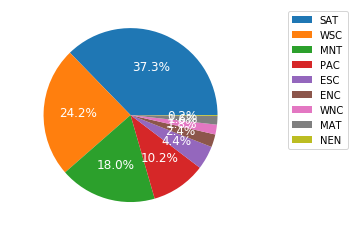

In [39]:
plot = df['Region'].value_counts().plot.pie(legend=True,autopct='%1.1f%%',textprops=dict(color="w",size="12"))
plot.legend(bbox_to_anchor=(1.2,1), loc="upper left")
plot.axes.get_yaxis().set_visible(False)

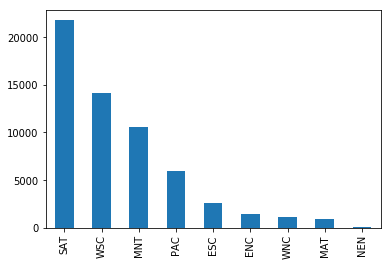

In [40]:
plot = df['Region'].value_counts().plot(kind='bar')

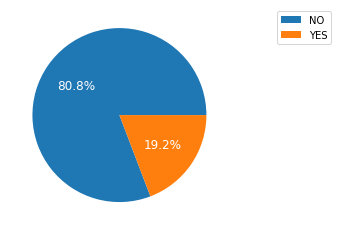

In [41]:
sost = []

for i in df['Trim']:
    if i == 'Bas':
        sost.append('YES')
    else:
        sost.append("NO")

df['IsBase'] = sost
plot = df['IsBase'].value_counts().plot.pie(legend=True,autopct='%1.1f%%',textprops=dict(color="w",size="12"))
plot.legend(bbox_to_anchor=(1.2,1), loc="upper left")
plot.axes.get_yaxis().set_visible(False)

In [42]:
df[['Trim']]

Trim
0       EX
1      SXT
2       SE
3        S
4      Bas
5       EX
6      Bas
7       SE
8      NaN
9      NaN
10     Bas
11     Bas
12     SLT
13     Bas
14     Bas
15      LS
16     Bas
17      LS
18     NaN
19     Bas
20     SXT
21     SLT
22     Bas
23       S
24      LS
25      XE
26     Bas
27     Bas
28     XLS
29      SE
...    ...
58356   LS
58357    S
58358  GLS
58359   LS
58360  SXT
58361  SEL
58362  SXT
58363  NaN
58364   SE
58365   LS
58366  Nor
58367   SE
58368   SE
58369   LX
58370  Bas
58371  Bas
58372   LT
58373   LE
58374  Bas
58375  Bas
58376   LT
58377  NaN
58378  Bas
58379  STX
58380  SXT
58381   LS
58382  ZX4
58383   LS
58384  Bas
58385  Bas

[58386 rows x 1 columns]

In [43]:
df['IsBase'].isnull().sum()

0

### Eliminazione variabili (idee)

- VehicleYear
- AUCGUART
- PRIMEUNIT
- 

In [44]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Trim                     1911
SubModel                    7
Color                       7
Transmission                8
WheelTypeID              2573
WheelType                2577
Nationality                 4
Size                        4
TopThreeAmericanName        4
AAAP                       13
AACP                       13
ARAP                       13
ARCP                       13
CAAP                       13
CACP                       13
CRAP                       13
CRCP                       13
PRIMEUNIT               55703
AUCGUART                55703
dtype: int64

Per sostituire WheelType ci accorgiamo che raggruppando su IsBase abbiamo mode diverse per i due gruppi

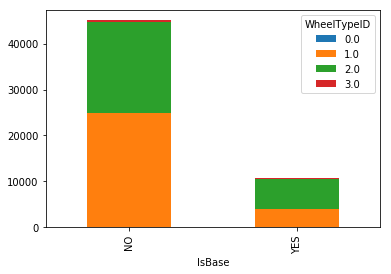

In [45]:
pclass_xt = pd.crosstab(df['IsBase'], df['WheelTypeID'])
pclass_xt.plot(kind='bar', stacked=True)

Sostituisco tutti i missing values di WheelType ID con la moda del gruppo relativo a trim base o no: se il veicolo non è base allora alloy è la moda (vedi grafico sopra)...

In [46]:
df['WheelTypeID'] = df.groupby(['IsBase']).WheelTypeID.apply(lambda x: x.fillna(x.mode()[0]))
df['WheelTypeID'].isnull().sum()

0

Non faccio niente con wheelType perchè secondo me quell'attributo va frullato, tanto è ridondante con wheelTypeID

Per quanto riguarda nationality, ci accorgiamo che i missing values sono tutti di marche americane. Quindi TopThreeAmericanName sarà OTHER in ogni caso, e nationality sarà american

In [47]:
df[df['Nationality'].isnull()][['TopThreeAmericanName', 'Transmission', 'Model', 'Make', 'Nationality']]

TopThreeAmericanName Transmission           Model   Make Nationality
15769                  NaN         AUTO     SIERRA 1500    GMC         NaN
18532                  NaN         AUTO    NITRO 4WD V6  DODGE         NaN
20016                  NaN         AUTO  PATRIOT 2WD 4C   JEEP         NaN
35157                  NaN         AUTO  PATRIOT 2WD 4C   JEEP         NaN

In [48]:
df['TopThreeAmericanName'].fillna('OTHER', inplace=True)
df['TopThreeAmericanName'].isnull().sum()

0

In [49]:
df['Nationality'].fillna('OTHER', inplace=True)
df['Nationality'].isnull().sum()

0

Addesso controlliamo i missing values di transmission, e notiamo che la distribuzione è molto più vicina al cambio automatico rispetto a quello manuale, quindi usiamo la moda. Inoltre guardando i missing values notiamo che son tutte macchine americane.

In [50]:
df[df['Transmission'].isnull()][['TopThreeAmericanName', 'Transmission', 'Model', 'Make']]

TopThreeAmericanName Transmission                 Model       Make
23019                   GM          NaN    IMPALA 3.4L V6 SFI  CHEVROLET
28280                 FORD          NaN  FREESTAR FWD V6 3.9L       FORD
28961                   GM          NaN   GRAND AM V6 3.4L V6    PONTIAC
33225                 FORD          NaN  MOUNTAINEER 2WD V8 4    MERCURY
35224             CHRYSLER          NaN  STRATUS V6 2.7L V6 M      DODGE
40504                 FORD          NaN   MONTEGO 3.0L V6 EFI    MERCURY
48641             CHRYSLER          NaN  STRATUS V6 2.7L V6 M      DODGE
50661                   GM          NaN  S10 PICKUP 2WD 4C 2.  CHEVROLET

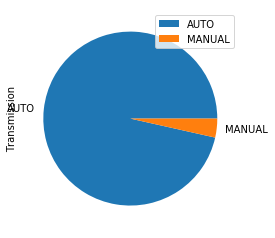

In [51]:
df['Transmission'].value_counts().plot.pie(legend=True)

In [52]:
df['Transmission'].fillna(df['Transmission'].mode()[0], inplace=True)
df['Transmission'].isnull().sum()

0

Per quanto riguarda il colore, abbiamo provato a raggruppare sugli attributi significativi (make, size, year), ma comunque sia la moda era sempre SILVER. 

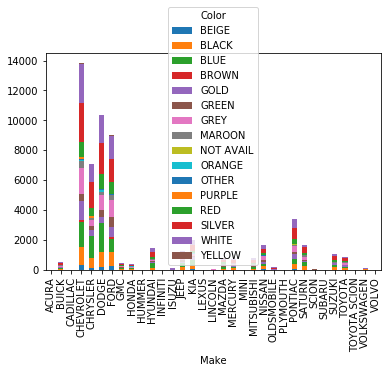

In [53]:
pclass_xt = pd.crosstab(df['Make'], df['Color'])
pclass_xt.plot(kind='bar', stacked=True)

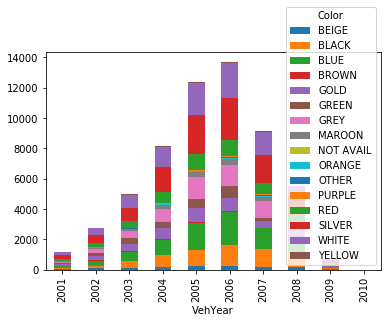

In [54]:
pclass_xt = pd.crosstab(df['VehYear'], df['Color'])
pclass_xt.plot(kind='bar', stacked=True)

In [55]:
df[df['Color'].isnull()][['TopThreeAmericanName', 'Transmission', 'Model', 'Make', 'Color']]

TopThreeAmericanName Transmission                 Model       Make Color
23019                   GM         AUTO    IMPALA 3.4L V6 SFI  CHEVROLET   NaN
28280                 FORD         AUTO  FREESTAR FWD V6 3.9L       FORD   NaN
28961                   GM         AUTO   GRAND AM V6 3.4L V6    PONTIAC   NaN
33225                 FORD         AUTO  MOUNTAINEER 2WD V8 4    MERCURY   NaN
35224             CHRYSLER         AUTO  STRATUS V6 2.7L V6 M      DODGE   NaN
48641             CHRYSLER         AUTO  STRATUS V6 2.7L V6 M      DODGE   NaN
50661                   GM         AUTO  S10 PICKUP 2WD 4C 2.  CHEVROLET   NaN

In [56]:
df['Color'].fillna(df['Color'].mode()[0], inplace=True) #Sostituisco con la moda che è silver
df['Color'].isnull().sum()

0

Adesso size, abbiamo notato che marche diverse hanno distribuzioni diversi, quindi raggruppiamo su make e prendiamo la moda

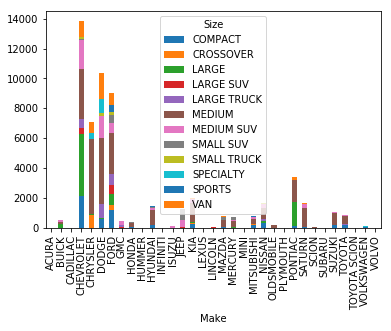

In [57]:
pclass_xt = pd.crosstab(df['Make'], df['Size'])
pclass_xt.plot(kind='bar', stacked=True)

In [58]:
df[df['Size'].isnull()][['TopThreeAmericanName', 'Transmission', 'Model', 'Make', 'Color']]

TopThreeAmericanName Transmission           Model   Make   Color
15769                OTHER         AUTO     SIERRA 1500    GMC   WHITE
18532                OTHER         AUTO    NITRO 4WD V6  DODGE   WHITE
20016                OTHER         AUTO  PATRIOT 2WD 4C   JEEP  SILVER
35157                OTHER         AUTO  PATRIOT 2WD 4C   JEEP   BLACK

In [59]:
df['Size'] = df.groupby(['Make']).Size.apply(lambda x: x.fillna(x.mode()[0]))
df['Size'].isnull().sum()

0

Sub model è strano, ho pensato di raggruppare su make e modello, e prendere la moda di quello

In [60]:
df[df['SubModel'].isnull()][['TopThreeAmericanName', 'Nationality', 'Model', 'Make', 'SubModel']]

TopThreeAmericanName Nationality                 Model       Make  \
23019                   GM    AMERICAN    IMPALA 3.4L V6 SFI  CHEVROLET   
28280                 FORD    AMERICAN  FREESTAR FWD V6 3.9L       FORD   
28961                   GM    AMERICAN   GRAND AM V6 3.4L V6    PONTIAC   
33225                 FORD    AMERICAN  MOUNTAINEER 2WD V8 4    MERCURY   
35224             CHRYSLER    AMERICAN  STRATUS V6 2.7L V6 M      DODGE   
48641             CHRYSLER    AMERICAN  STRATUS V6 2.7L V6 M      DODGE   
50661                   GM    AMERICAN  S10 PICKUP 2WD 4C 2.  CHEVROLET   

      SubModel  
23019      NaN  
28280      NaN  
28961      NaN  
33225      NaN  
35224      NaN  
48641      NaN  
50661      NaN

In [61]:
df['SubModel'] = df.groupby([df['Make'], df['Model']]).Size.apply(lambda x: x.fillna(x.mode()[0]))
df['SubModel'].isnull().sum()

0

In [62]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Trim          1911
WheelType     2577
AAAP            13
AACP            13
ARAP            13
ARCP            13
CAAP            13
CACP            13
CRAP            13
CRCP            13
PRIMEUNIT    55703
AUCGUART     55703
dtype: int64

Perfetto, a questo punto nessun missing value è rimasto. Dobbiamo solo inserire la/e variabile/i da aggiungere per le medie, rimuovere quelle inutili

In [63]:
df.sort_values(['VehBCost'])['VehBCost'].head()

40998       1.0
53937     225.0
26371    1400.0
31167    1620.0
26693    1720.0
Name: VehBCost, dtype: float64

Qua tolgo tutti gli elementi per cui tutti gli elementi sono a 0 e controllo che non rimangano elementi di cui tutti gli Auction (XAXX) siano a 0 e tutti i Retail (XRXX). Elimino anche i 2/3 outliers di VehBCost

In [64]:
tresh = 1000
to_delete = df[(df['AAAP'] < tresh) &
   (df['AACP'] < tresh) &
   (df['ARAP'] < tresh) &
   (df['ARCP'] < tresh) &
   (df['CAAP'] < tresh) &
   (df['CACP'] < tresh) &
   (df['CRAP'] < tresh) &
   (df['CRCP'] < tresh)].index.tolist()
print(len(to_delete))

auction_delete = df[(df['AAAP'] < tresh) &
   (df['AACP'] < tresh) &
   (df['CAAP'] < tresh) &
   (df['CACP'] < tresh)].index.tolist()

retail_delete = df[(df['CRAP'] < tresh) &
   (df['CRCP'] < tresh) &
   (df['ARAP'] < tresh) &
   (df['ARCP'] < tresh)].index.tolist()
print(len(auction_delete))
print(len(retail_delete))

to_delete += auction_delete + retail_delete
to_delete = list(dict.fromkeys(to_delete))
print(len(to_delete))

print(df['VehBCost'].sort_values().head())

to_delete.append(40998)
to_delete.append(53937)

new_df = df.drop(index=to_delete)
df['RefId'].count() - new_df['RefId'].count()
(df.iloc[to_delete])[df['IsBadBuy'] == 1]['RefId'].count()

358
358
358
358
40998       1.0
53937     225.0
26371    1400.0
31167    1620.0
26693    1720.0
Name: VehBCost, dtype: float64


/home/marta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



47

In [65]:
new_df.drop(columns=['RefId',
    'VehYear',
    'IsBadBuy',
    'WheelTypeID',
    'BYRNO',
    'VNZIP1',
    'IsOnlineSale'],
    axis=1).corr()


VehicleAge    VehOdo      AAAP      AACP      ARAP  \
VehicleAge           1.000000  0.319951 -0.581860 -0.535744 -0.476445   
VehOdo               0.319951  1.000000 -0.018997  0.024146  0.029737   
AAAP                -0.581860 -0.018997  1.000000  0.989953  0.906420   
AACP                -0.535744  0.024146  0.989953  1.000000  0.897719   
ARAP                -0.476445  0.029737  0.906420  0.897719  1.000000   
ARCP                -0.442707  0.063149  0.906143  0.913849  0.989742   
CAAP                -0.592578 -0.032584  0.935195  0.920044  0.845121   
CACP                -0.550261  0.009794  0.929263  0.928514  0.841787   
CRAP                -0.521685  0.012803  0.865679  0.853229  0.908845   
CRCP                -0.487965  0.046630  0.864779  0.863992  0.901174   
VehBCost            -0.312975 -0.064702  0.805256  0.799663  0.763135   
WarrantyCost         0.261437  0.412337 -0.047300 -0.016182 -0.051085   
WheelTypeIDDelete   -0.146062 -0.133738 -0.088766 -0.112936 -0.071401   

                       ARCP      CAAP      CACP      CRAP      CRCP  VehBCost  \
VehicleAge        -0.442707 -0.592578 -0.550261 -0.521685 -0.487965 -0.312975   
VehOdo             0.063149 -0.032584  0.009794  0.012803  0.046630 -0.064702   
AAAP               0.906143  0.935195  0.929263  0.865679  0.864779  0.805256   
AACP               0.913849  0.920044  0.928514  0.853229  0.863992  0.799663   
ARAP               0.989742  0.845121  0.841787  0.908845  0.901174  0.763135   
ARCP               1.000000  0.839604  0.847717  0.897827  0.901205  0.764941   
CAAP               0.839604  1.000000  0.989929  0.911356  0.908474  0.794535   
CACP               0.847717  0.989929  1.000000  0.903952  0.917482  0.793777   
CRAP               0.897827  0.911356  0.903952  1.000000  0.989273  0.776552   
CRCP               0.901205  0.908474  0.917482  0.989273  1.000000  0.779404   
VehBCost           0.764941  0.794535  0.793777  0.776552  0.779404  1.000000   
WarrantyCost      -0.023263 -0.055165 -0.025255 -0.056850 -0.029583 -0.034867   
WheelTypeIDDelete -0.092310 -0.083545 -0.107460 -0.075680 -0.095960 -0.136114   

                   WarrantyCost  WheelTypeIDDelete  
VehicleAge             0.261437          -0.146062  
VehOdo                 0.412337          -0.133738  
AAAP                  -0.047300          -0.088766  
AACP                  -0.016182          -0.112936  
ARAP                  -0.051085          -0.071401  
ARCP                  -0.023263          -0.092310  
CAAP                  -0.055165          -0.083545  
CACP                  -0.025255          -0.107460  
CRAP                  -0.056850          -0.075680  
CRCP                  -0.029583          -0.095960  
VehBCost              -0.034867          -0.136114  
WarrantyCost           1.000000          -0.085738  
WheelTypeIDDelete     -0.085738           1.000000

In [66]:
sum_ = new_df.isnull().sum()
sum_[sum_ != 0]

Trim          1908
WheelType     2553
AAAP            13
AACP            13
ARAP            13
ARCP            13
CAAP            13
CACP            13
CRAP            13
CRCP            13
PRIMEUNIT    55346
AUCGUART     55346
dtype: int64

In [67]:
new_df.drop(columns=['Trim', 'WheelType', 'PRIMEUNIT', 'AUCGUART', 'VehYear', 'VNZIP1', 'VNST', 'WheelTypeIDDelete'], inplace=True)

sum_ = new_df.isnull().sum()
sum_[sum_ != 0]

AAAP    13
AACP    13
ARAP    13
ARCP    13
CAAP    13
CACP    13
CRAP    13
CRCP    13
dtype: int64

In [68]:
new_df.dropna(inplace=True)

sum_ = new_df.isnull().sum()
sum_[sum_ != 0]

Series([], dtype: int64)

Qua sotto vengono inserite tre nuove variabili:
- AuctionAVG: E' una media di tutti i valori disponibili con Auction nel nome (XAXX). Avevo tolto precedentemente quelli che erano tutti < della soglia, quindi mi aspetto di avere almeno un elemento su cui fare la media
- RetailAVG: E' una media di tutti i valori disponibili con Retail nel nome (XRXX). Stesso discorso di prima
- Trend: E' un numero che aumenta in modulo tanto più alta è la differenza fra average e current. Se current > average allora trend è positivo, altrimenti negativo. Se non ho disponibile alcun valore per current o nessun valore per average, il trend è 0

Alla fine stampo 4 valori in 5 righe.
La riga i-esima si legge come:

"numero di XAXX (average) di cui ho trovato solo i righe riempite, stessa cosa di XCXX, stessa cosa di AXXX, stessa cosa di CXXX"

In [69]:
sost_auct = []
sost_ret = []
prova_auc = []
prova_ret = []
prova_acquis = []
prova_current = []
trend =  []

for i, row in new_df.iterrows():
    n_ret = 0
    n_auc = 0
    n_acquis = 0
    n_current = 0
    retail = 0
    current = 0
    acquis = 0
    auction = 0
    # auction
    if row['AAAP'] >= tresh:
        n_auc = n_auc + 1
        n_acquis = n_acquis + 1
        acquis = acquis + row['AAAP']
        auction = auction + row['AAAP']
    if row['AACP'] >= tresh:
        n_auc = n_auc + 1
        n_acquis = n_acquis + 1
        auction = auction + row['AACP']
        acquis = acquis + row['AACP']
    if row['CAAP'] >= tresh:
        n_auc = n_auc + 1
        n_current = n_current + 1
        current = current + row['CAAP']
        auction = auction + row['CAAP']
    if row['CACP'] >= tresh:
        n_auc = n_auc + 1
        n_current = n_current + 1
        current = current + row['CACP']
        auction = auction + row['CACP']
    #retail
    if row['ARAP'] >= tresh:
        n_ret = n_ret + 1
        n_acquis = n_acquis + 1
        acquis = acquis + row['ARAP']
        retail = retail + row['ARAP']
    if row['ARCP'] >= tresh:
        n_ret = n_ret + 1
        n_acquis = n_acquis + 1
        acquis = acquis + row['ARCP']
        retail = retail + row['ARCP']
    if row['CRAP'] >= tresh:
        n_ret = n_ret + 1
        n_current = n_current + 1
        current = current + row['CRAP']
        retail = retail + row['CRAP']
    if row['CRCP'] >= tresh:
        n_ret = n_ret + 1
        n_current = n_current + 1
        current = current + row['CRCP']
        retail = retail + row['CRCP']
        
    sost_auct.append((auction / n_auc))
    sost_ret.append((retail / n_ret))
    
    if n_acquis == 0 or n_current == 0:
        trend.append(0)
    else:
        a = (current - acquis) / (current + acquis)
        trend.append(a)
    
    prova_auc.append(n_auc)
    prova_ret.append(n_ret)
    prova_acquis.append(n_acquis)
    prova_current.append(n_current)
        
new_df['AuctionAVG'] = sost_auct
new_df['RetailAVG'] = sost_ret
new_df['Trend'] = trend

for i in range (0,5):
    print(prova_auc.count(i), " " , prova_ret.count(i), " ", prova_acquis.count(i), " " , prova_current.count(i))


0   0   290   38
0   0   0   3
332   328   0   0
12   3   2   12
57669   57682   57721   57960


In [70]:
a = new_df[new_df['IsBadBuy']== 0]['RefId'].count()
b = new_df[new_df['IsBadBuy']== 1]['RefId'].count() 
(a*100)/(a+b)
# distribuzione di goodBuy vs badBuy

87.65621498629618

In [71]:
new_df.head()

RefId  IsBadBuy   PurchDate  Auction  VehicleAge      Make  \
0    326         1  10/25/2010    ADESA           2       KIA   
1  42991         0   5/27/2009  MANHEIM           3     DODGE   
2  55273         0   3/18/2010    OTHER           2     DODGE   
3  29058         0    6/8/2009    OTHER           4      FORD   
4  34991         0    3/4/2009  MANHEIM           4  CHRYSLER   

                  Model SubModel   Color Transmission  ...     CRCP  BYRNO  \
0               SPECTRA   MEDIUM    BLUE         AUTO  ...  10650.0   5546   
1  STRATUS V6 2.7L V6 M   MEDIUM  SILVER         AUTO  ...   7478.0  99750   
2               CALIBER   MEDIUM   BLACK         AUTO  ...  11350.0  99761   
3  FREESTAR FWD V6 3.9L      VAN   BROWN         AUTO  ...   7691.0  99761   
4  TOWN & COUNTRY FWD V      VAN    BLUE         AUTO  ...   7856.0  20833   

  VehBCost IsOnlineSale WarrantyCost  Region  IsBase  AuctionAVG  RetailAVG  \
0   6100.0            0          533     SAT      NO      7128.5    10300.0   
1   4000.0            0         1630     SAT      NO      5970.5     6948.0   
2   7500.0            0          693     WSC      NO      8061.5    11199.0   
3   4725.0            0         1633     MNT      NO      5737.5     6696.5   
4   5670.0            0         1623     WSC     YES      6061.0     7046.0   

      Trend  
0 -0.012594  
1  0.000000  
2 -0.022092  
3  0.000000  
4  0.004692  

[5 rows x 32 columns]

In [72]:
new_df.drop(columns=['AAAP', 'AACP', 'CAAP', 'CACP', 'ARAP', 'ARCP', 'CRAP', 'CRCP'], inplace=True)

In [73]:
for col in new_df.columns:
    print(col)

RefId
IsBadBuy
PurchDate
Auction
VehicleAge
Make
Model
SubModel
Color
Transmission
WheelTypeID
VehOdo
Nationality
Size
TopThreeAmericanName
BYRNO
VehBCost
IsOnlineSale
WarrantyCost
Region
IsBase
AuctionAVG
RetailAVG
Trend


In [74]:
new_df.to_csv('training_cleaned.csv')

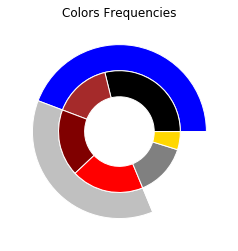

In [75]:
mostFreq = []
menoFreq = []
for i in new_df['Color']:
    if i == "SILVER" or i == "WHITE" or i == "BLUE":
        mostFreq.append(i)
    elif i != "OTHER" and i != "NOT AVAIL":
        menoFreq.append(i)
        
threeColors = Counter(mostFreq)
other = Counter(menoFreq)



fig, ax = plt.subplots()
size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

outer_colors = threeColors
inner_colors = other

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Colors Frequencies')
plt.show()


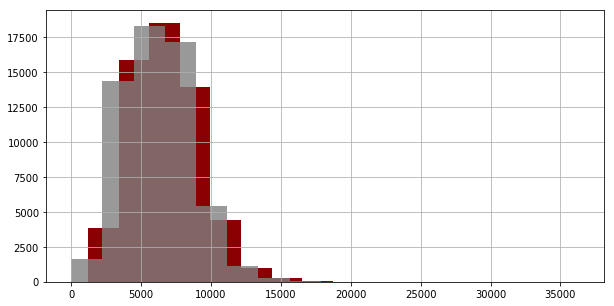

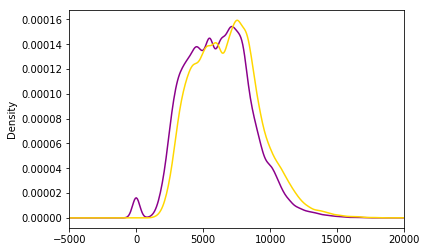

In [76]:
#Due variabili a paragone:
#- AuctionAVG nel nuovo dataframe dopo la modifica
#- AAAP vecchio Dataframe prima della modifica

fig = plt.figure(figsize=(10, 5)) 

new_df['AuctionAVG'].hist(bins=16, color= 'darkred' )
df['AAAP'].hist(bins=16, color = 'grey', alpha=0.8)
plt.show()

#OPPURE

x = plt.xlim((-5000, 20000))
df["AAAP"].plot.kde(x = 'x', color = 'darkmagenta') 
new_df['AuctionAVG'].plot.kde (x = 'x', color = 'gold')



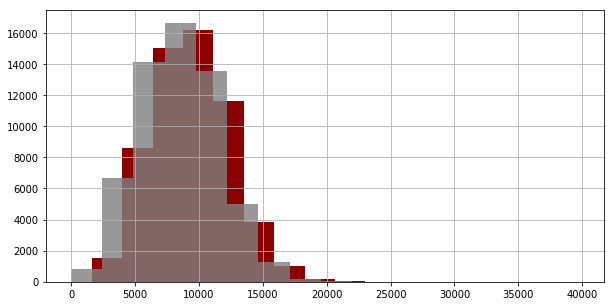

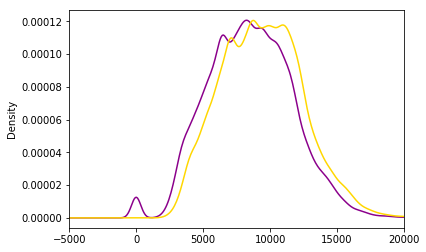

In [77]:
#Due variabili a paragone:
#- RetailAVG nel nuovo dataframe dopo la modifica
#- ARAP vecchio Dataframe prima della modifica

fig = plt.figure(figsize=(10, 5)) 

new_df['RetailAVG'].hist(bins=16, color= 'darkred')
df['ARAP'].hist(bins=16, color = 'grey', alpha=0.8)
plt.show()

#OPPURE

x = plt.xlim((-5000, 20000))
df["ARAP"].plot.kde(x = 'x', color = 'darkmagenta') 
new_df['RetailAVG'].plot.kde(x = 'x', color = 'gold')

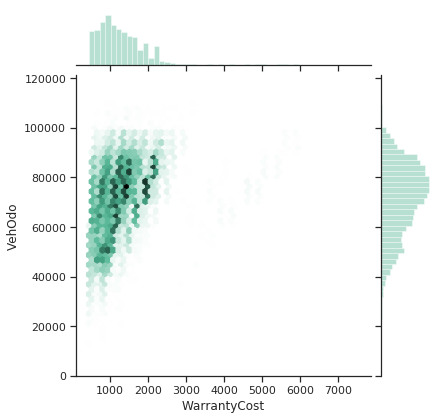

In [84]:
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = new_df['WarrantyCost']
y = new_df['VehOdo']

sns.jointplot(x, y, kind="hex", color="#4CB391")


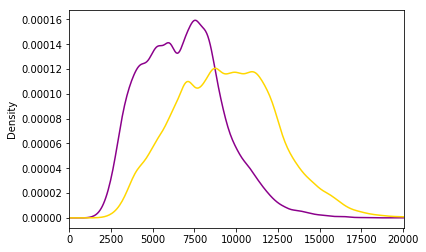

In [79]:
x = plt.xlim((0, 20050))
new_df["AuctionAVG"].plot.kde(x = 'x', color = 'darkmagenta') 
new_df['RetailAVG'].plot.kde(x = 'x', color = 'gold')

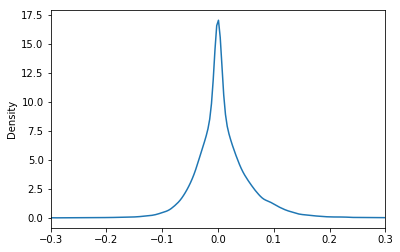

In [80]:
x = plt.xlim((-0.3, 0.3))

new_df["Trend"].plot.kde(x = 'x') 

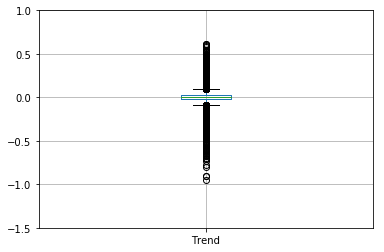

In [81]:
plt.ylim((-1.5, 1))

new_df.boxplot(column=['Trend'])


   COSE DA FARE:


- rappresentare graficamente Contakilometri
- Rappresentare graficamente la variabile Trend
- Trim: ricontrollare (?)



In [82]:
len(new_df[new_df['Trend'] == 0.0])

7075

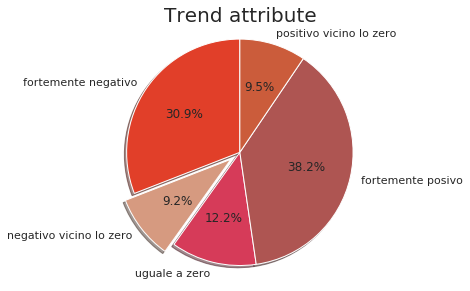

In [117]:
primo = []
secondo = []
zero = []
primoAlto = []
secondoAlto = []

for i in new_df['Trend']:
    if i < -0.01:
        primo.append(i)
    elif i < 0:
        primoAlto.append(i)
    elif i == 0:
        zero.append(i)
    elif i < 0.01:
        secondoAlto.append(i)
    else:
        secondo.append(i)


primo = len(primo)
primoAlto = len(primoAlto)
zero = len(zero)
secondo = len(secondo)
secondoAlto= len(secondoAlto)

# Pie chart
labels = ['fortemente negativo','negativo vicino lo zero', 'uguale a zero','fortemente posivo','positivo vicino lo zero']
sizes = [primo, primoAlto, zero, secondo, secondoAlto]# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0, 0, 0) #add colors
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', 
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title('Trend attribute', fontsize=20)
plt.show()

#cambiare i colori

In [113]:
len(new_df[new_df['Trend'] < 0]) - len(new_df[new_df['Trend'] < -0.01])

5339

# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    new_df['Trend'].value_counts(),
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()